<h2> Importing libraries</h2>

In [1]:
# data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import warnings 
warnings.filterwarnings('ignore')

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

<h3>reading file</h3>

In [7]:
data = pd.read_csv("desktop//diabetes.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
pip install lazypredict

In [11]:
from lazypredict.Supervised import LazyClassifier

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome',axis=1), 
                                                    data['Outcome'], test_size=0.2, 
                                                    random_state= 42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.65it/s]


In [12]:
models.sort_values('Accuracy',ascending =False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.78,0.76,0.76,0.78,0.06
RidgeClassifierCV,0.77,0.75,0.75,0.77,0.12
GaussianNB,0.77,0.75,0.75,0.77,0.03
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.81
RidgeClassifier,0.76,0.74,0.74,0.76,0.27
LinearSVC,0.75,0.74,0.74,0.75,0.04
LogisticRegression,0.75,0.74,0.74,0.75,0.45
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.21
DecisionTreeClassifier,0.75,0.74,0.74,0.75,0.02


In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


<h3>Feature engineering</h3>

In [14]:
data.describe(include='all').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00


<h3> for pregnancies</h3>

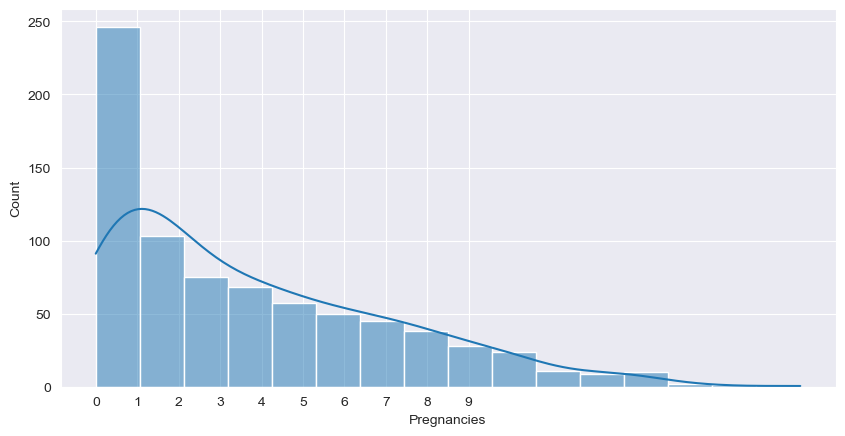

In [20]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.histplot(data=data, x="Pregnancies", kde=True)
ax.set_xticks(range(10))
plt.show()

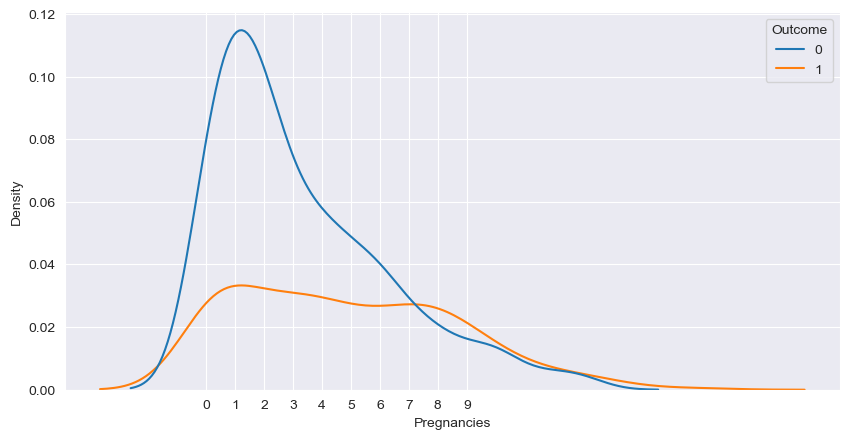

In [23]:
plt.figure(figsize=(10,5),dpi=100)
ax = sns.kdeplot(data=data, x="Pregnancies", hue='Outcome')
ax.set_xticks(range(10))
plt.show()

In [27]:
def plots(data, variable):

    plt.figure(figsize=(16, 4), dpi=200)
    
    # histogram
    ax = plt.subplot(1, 3, 1)
    sns.kdeplot(data[variable], color='Red', fill=True)
    ax.set_title("Density Plot", fontsize=15, fontweight='normal', fontfamily='serif')
    plt.ylabel('Density', fontfamily='serif')
    plt.xlabel(variable, fontfamily='serif')
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)  
    
    # Q-Q plot
    ax = plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    ax.get_lines()[0].set_markerfacecolor('r')
    ax.set_title("Probability Plot", fontsize=15, fontweight='normal', fontfamily='serif')
    plt.ylabel('Quantiles', fontfamily='serif')
    plt.xlabel('Theoretical Quantiles', fontfamily='serif')
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # boxplot
    ax = plt.subplot(1, 3, 3)
    sns.boxplot(x=data[variable], color='Lightblue')
    plt.title('Boxplot')
    ax.set_title("Boxplot", fontsize=15, fontweight='normal', fontfamily='serif')
    plt.xlabel(variable, fontfamily='serif')
    
    for s in ['top', 'left', 'right']:
        ax.spines[s].set_visible(False)    
    
    plt.show()
    


<h3>plot</h3>

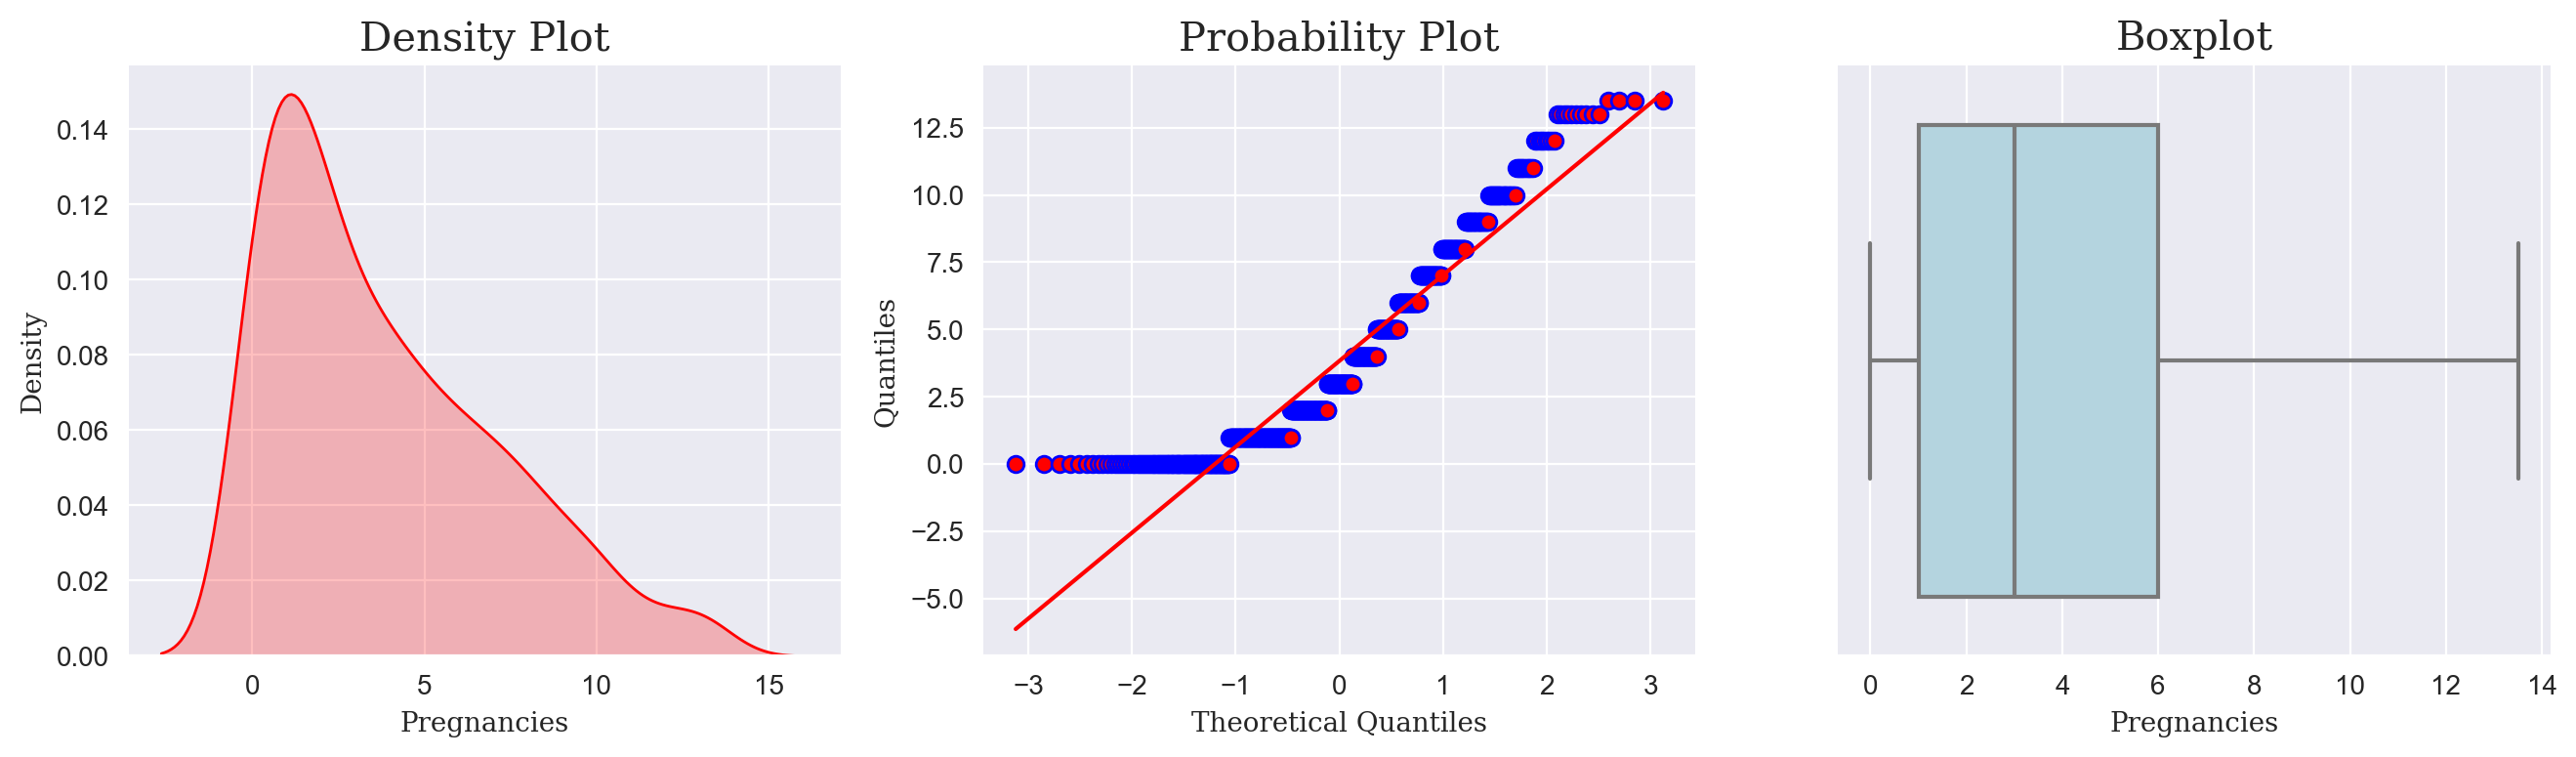

In [29]:
plots(data, 'Pregnancies')

In [25]:
def find_skewed_boundaries(data, variable, distance):

    IQR = data[variable].quantile(0.75) - data[variable].quantile(0.25)

    lower_boundary = data[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = data[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# finding upper, lower boundary for pregnancies 
upper_boundary, lower_boundary = find_skewed_boundaries(data, 'Pregnancies', 1.5)
print(f"UPPER: {upper_boundary} & LOWER: {lower_boundary}")

# updating all values greater than upper to upper value
data.loc[data['Pregnancies'] > upper_boundary, 'Pregnancies'] = upper_boundary

UPPER: 13.5 & LOWER: -6.5


creating column more than one child

In [30]:
children = [1 if i > 0 else 0 for i in data['Pregnancies']]
data['More than 1 child?'] = children

<AxesSubplot:xlabel='More than 1 child?', ylabel='count'>

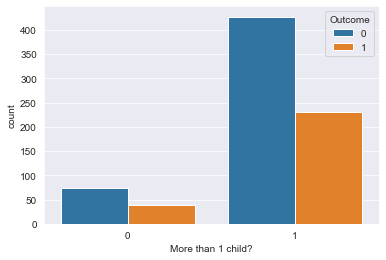

In [31]:
sns.countplot(data=data, x='More than 1 child?',
              hue='Outcome')

<h3> for gulcose</h3>

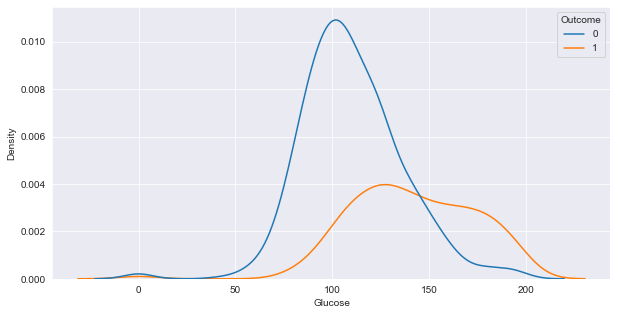

In [37]:
plt.figure(figsize=(10,5))
sns.kdeplot('Glucose', hue='Outcome',data=data)
plt.show()

<h3> plot</h3>

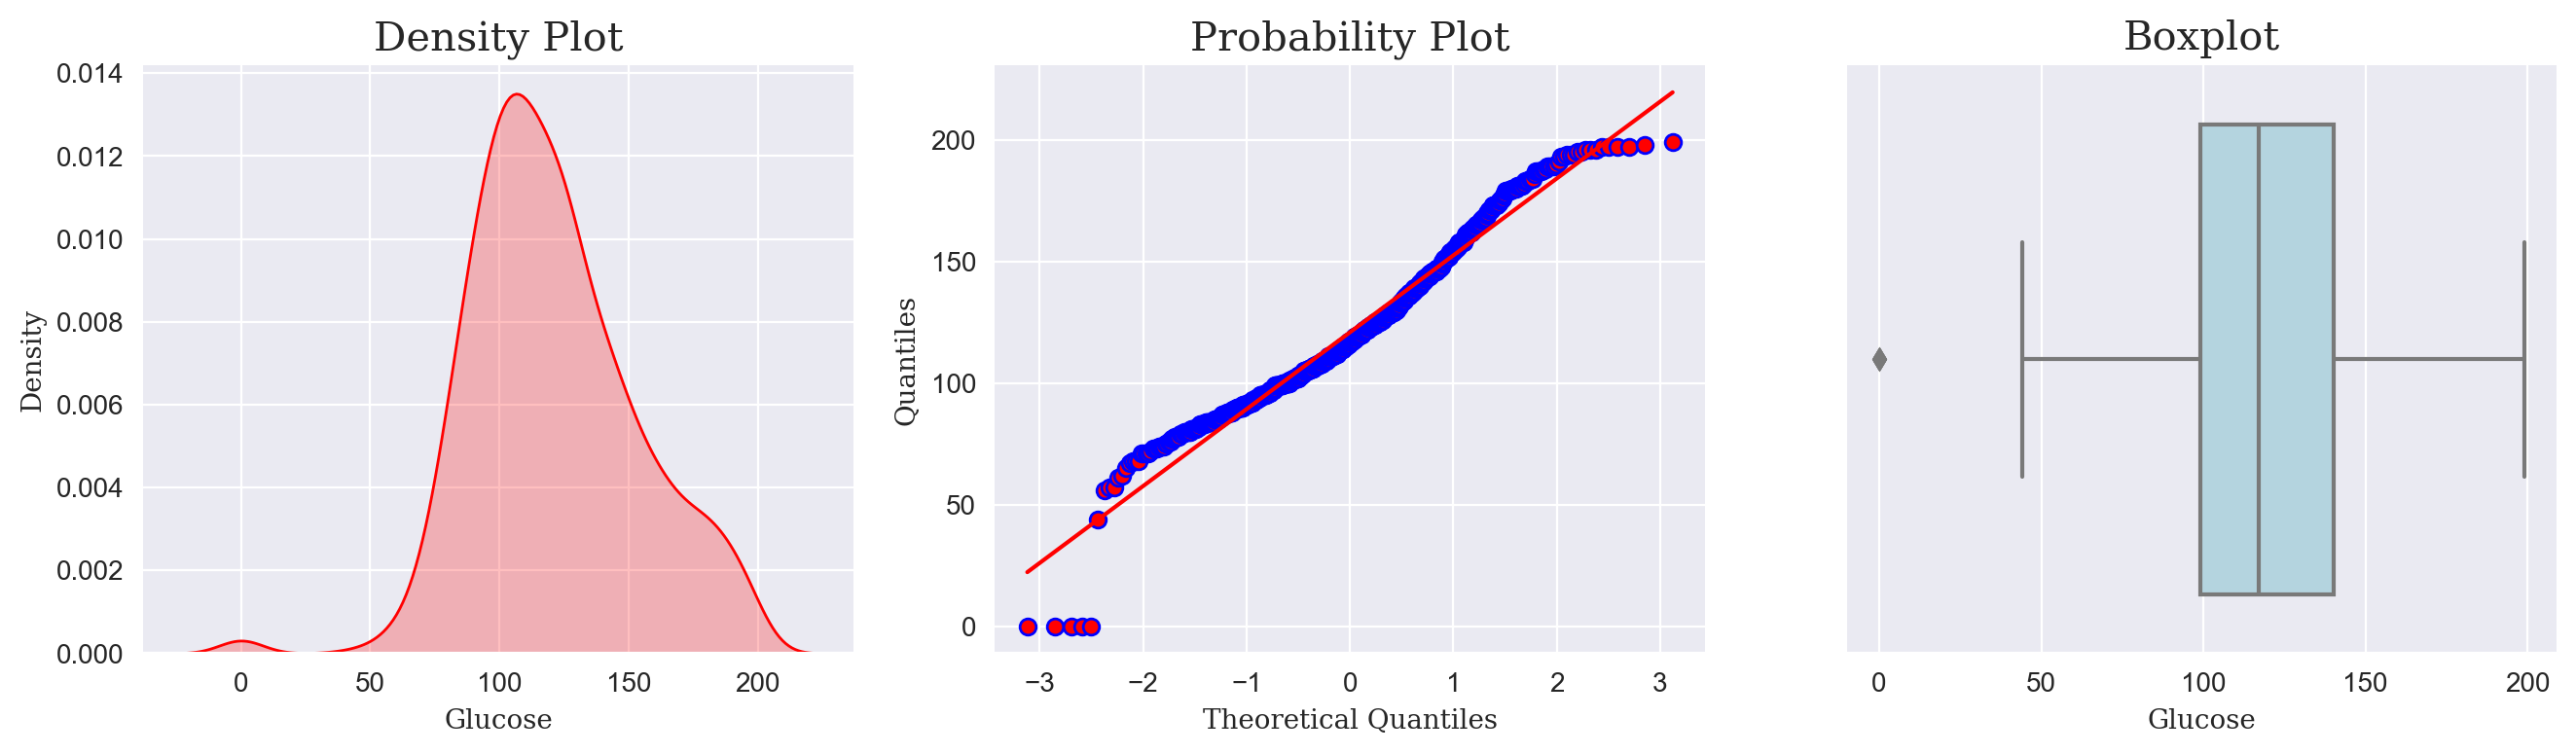

In [38]:
plots(data, 'Glucose')

In [39]:
# finding upper, lower boundary for glucose 
upper_boundary, lower_boundary = find_skewed_boundaries(data, 'Glucose', 1.5)
print(f"UPPER: {upper_boundary} & LOWER: {lower_boundary}")

# updating all values greater than upper to upper value
data.loc[data['Glucose'] > upper_boundary, 'Glucose'] = upper_boundary
data.loc[data['Glucose'] < lower_boundary, 'Glucose'] = lower_boundary

UPPER: 202.125 & LOWER: 37.125


<h3> for BloodPressure</h3>

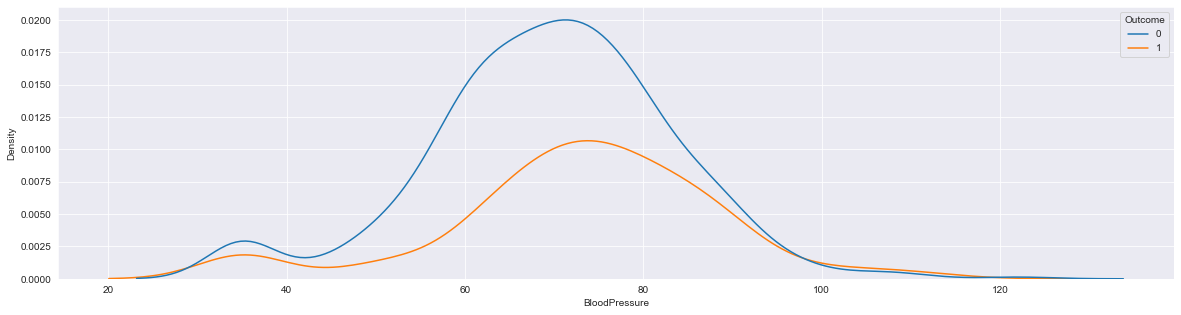

In [47]:
plt.figure(figsize=(20,5))
sns.kdeplot('BloodPressure', hue='Outcome',data=data)
plt.show()

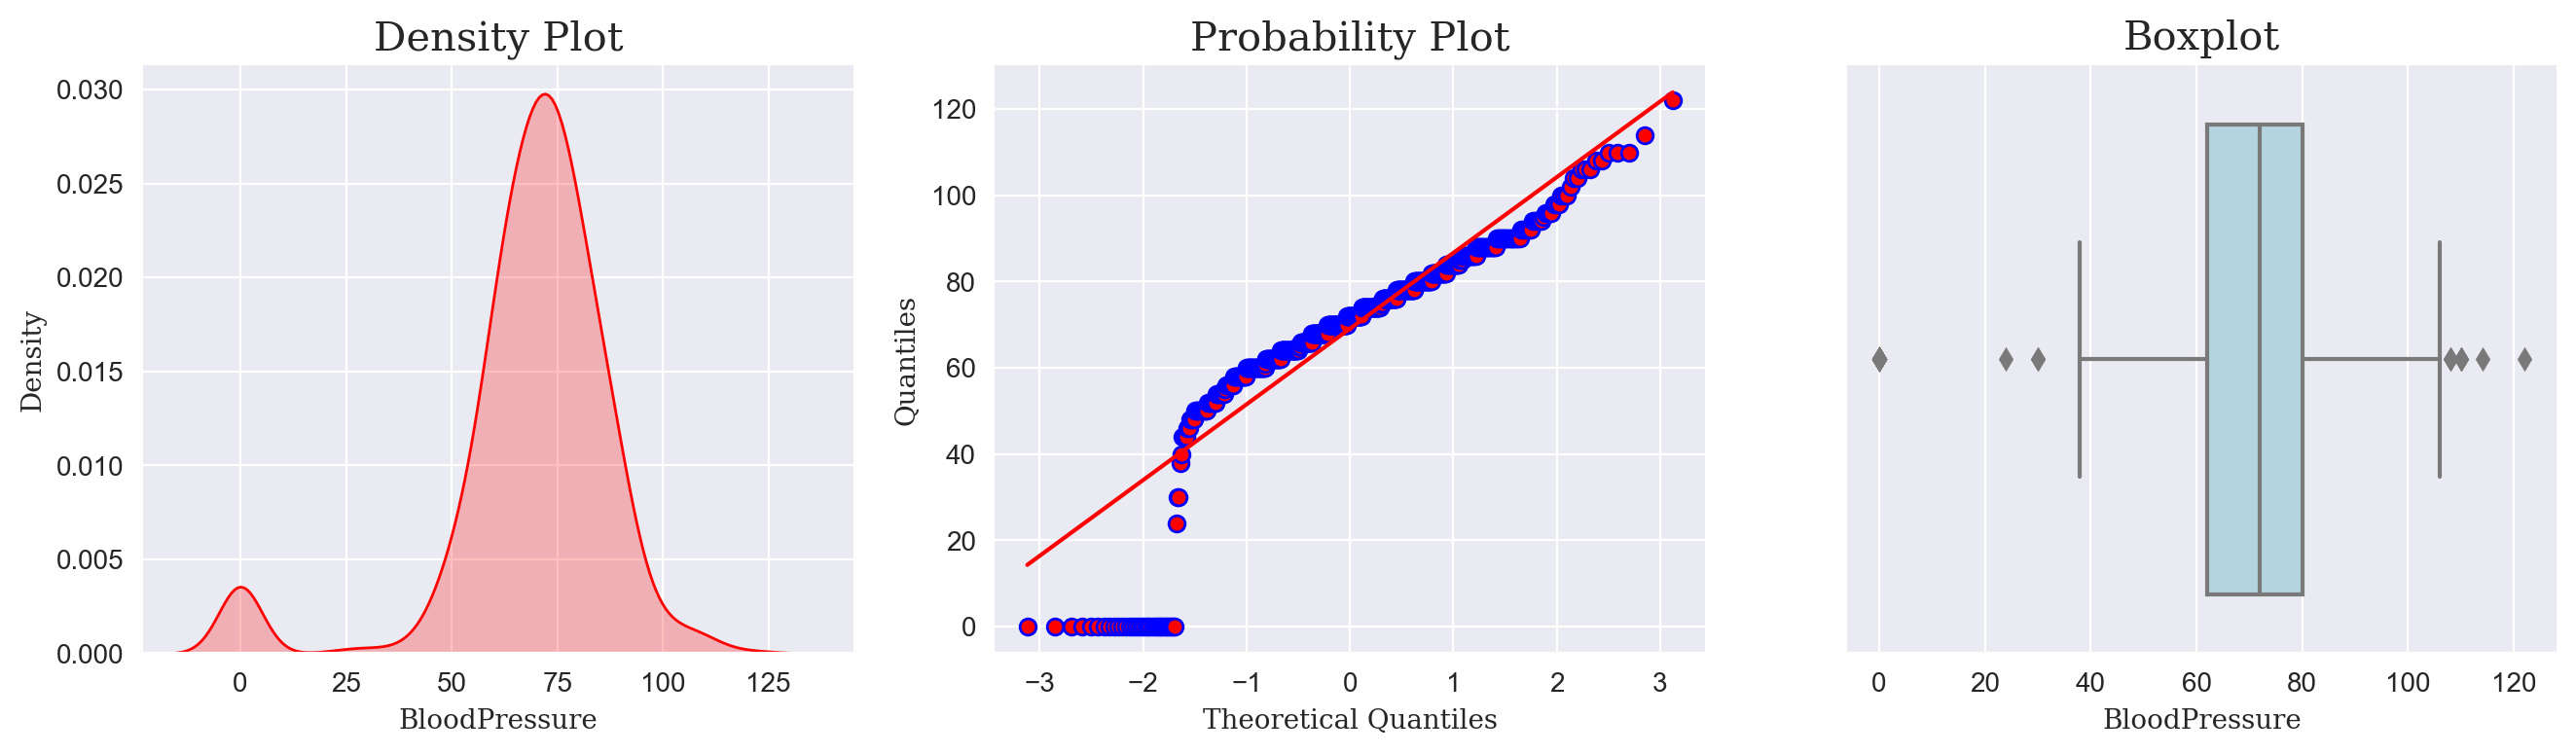

In [42]:
plots(data, 'BloodPressure')

In [43]:
data[data['BloodPressure']<=0].sort_values('Outcome', ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,More than 1 child?
706,10.00,115.00,0,0,0,0.00,0.26,30,1,1
266,0.00,138.00,0,0,0,36.30,0.93,25,1,0
468,8.00,120.00,0,0,0,30.00,0.18,38,1,1
435,0.00,141.00,0,0,0,42.40,0.20,29,1,0
535,4.00,132.00,0,0,0,32.90,0.30,23,1,1
15,7.00,100.00,0,0,0,30.00,0.48,32,1,1
357,13.00,129.00,0,30,0,39.90,0.57,44,1,1
332,1.00,180.00,0,0,0,43.30,0.28,41,1,1
300,0.00,167.00,0,0,0,32.30,0.84,30,1,0
269,2.00,146.00,0,0,0,27.50,0.24,28,1,1


In [44]:
# finding upper, lower boundary for blood pressure 
upper_boundary, lower_boundary = find_skewed_boundaries(data, 'BloodPressure', 1.5)
print(f"UPPER: {upper_boundary} & LOWER: {lower_boundary}")

data.loc[data['BloodPressure'] < lower_boundary, 'BloodPressure'] = lower_boundary

UPPER: 107.0 & LOWER: 35.0


<h3>for BMI</h3>

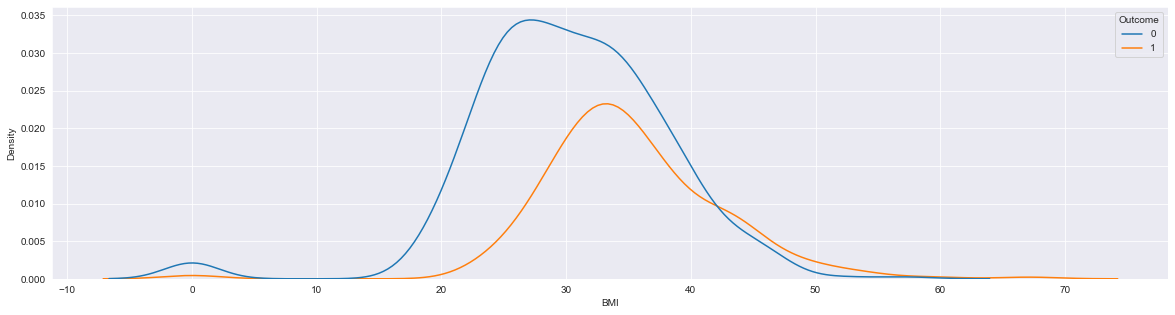

In [46]:
plt.figure(figsize=(20,5))
sns.kdeplot('BMI', hue='Outcome',data=data)
plt.show()

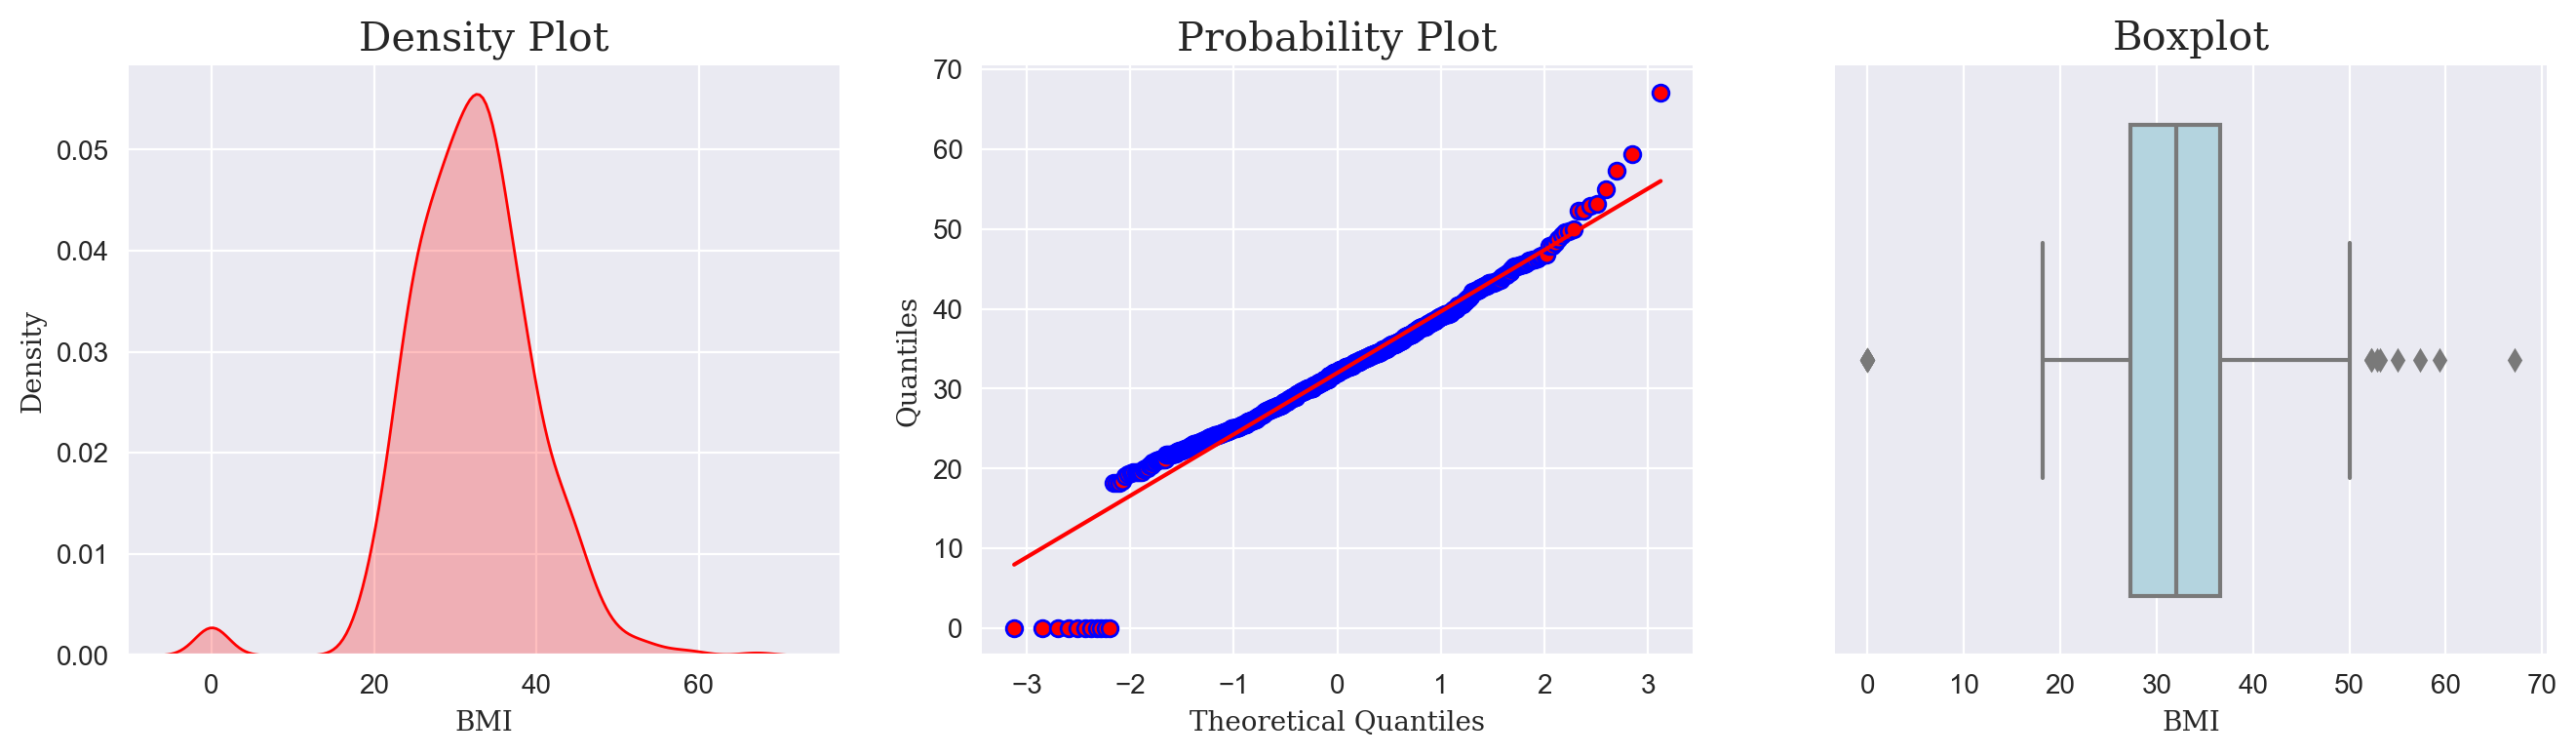

In [48]:
plots(data, 'BMI')

In [49]:
# as BMI is normally distributed
def find_normal_boundaries(data, variable):

    upper_boundary_normal = data[variable].mean() + 3 * data[variable].std()
    lower_boundary_normal = data[variable].mean() - 3 * data[variable].std()

    return upper_boundary_normal, lower_boundary_normal

# finding upper, lower boundary for insulin 
upper_boundary, lower_boundary = find_normal_boundaries(data, 'BMI')
print(f"UPPER: {upper_boundary} & LOWER: {lower_boundary}")

# updating all values greater than upper to upper value
data.loc[data['BMI'] > upper_boundary, 'BMI'] = upper_boundary
data.loc[data['BMI'] < lower_boundary, 'BMI'] = lower_boundary

UPPER: 55.645059086126295 & LOWER: 8.340097163873654


In [50]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'More than 1 child?'],
      dtype='object')

<h3> Age</h3>

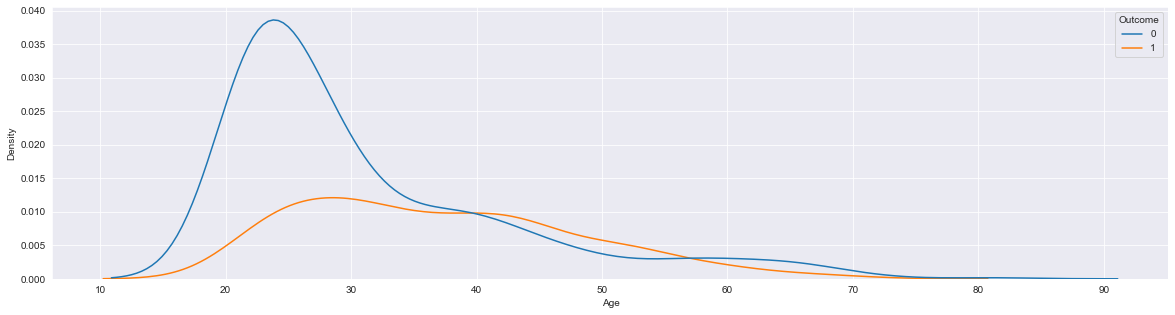

In [53]:
plt.figure(figsize=(20,5))
sns.kdeplot('Age', hue='Outcome',data=data)
plt.show()


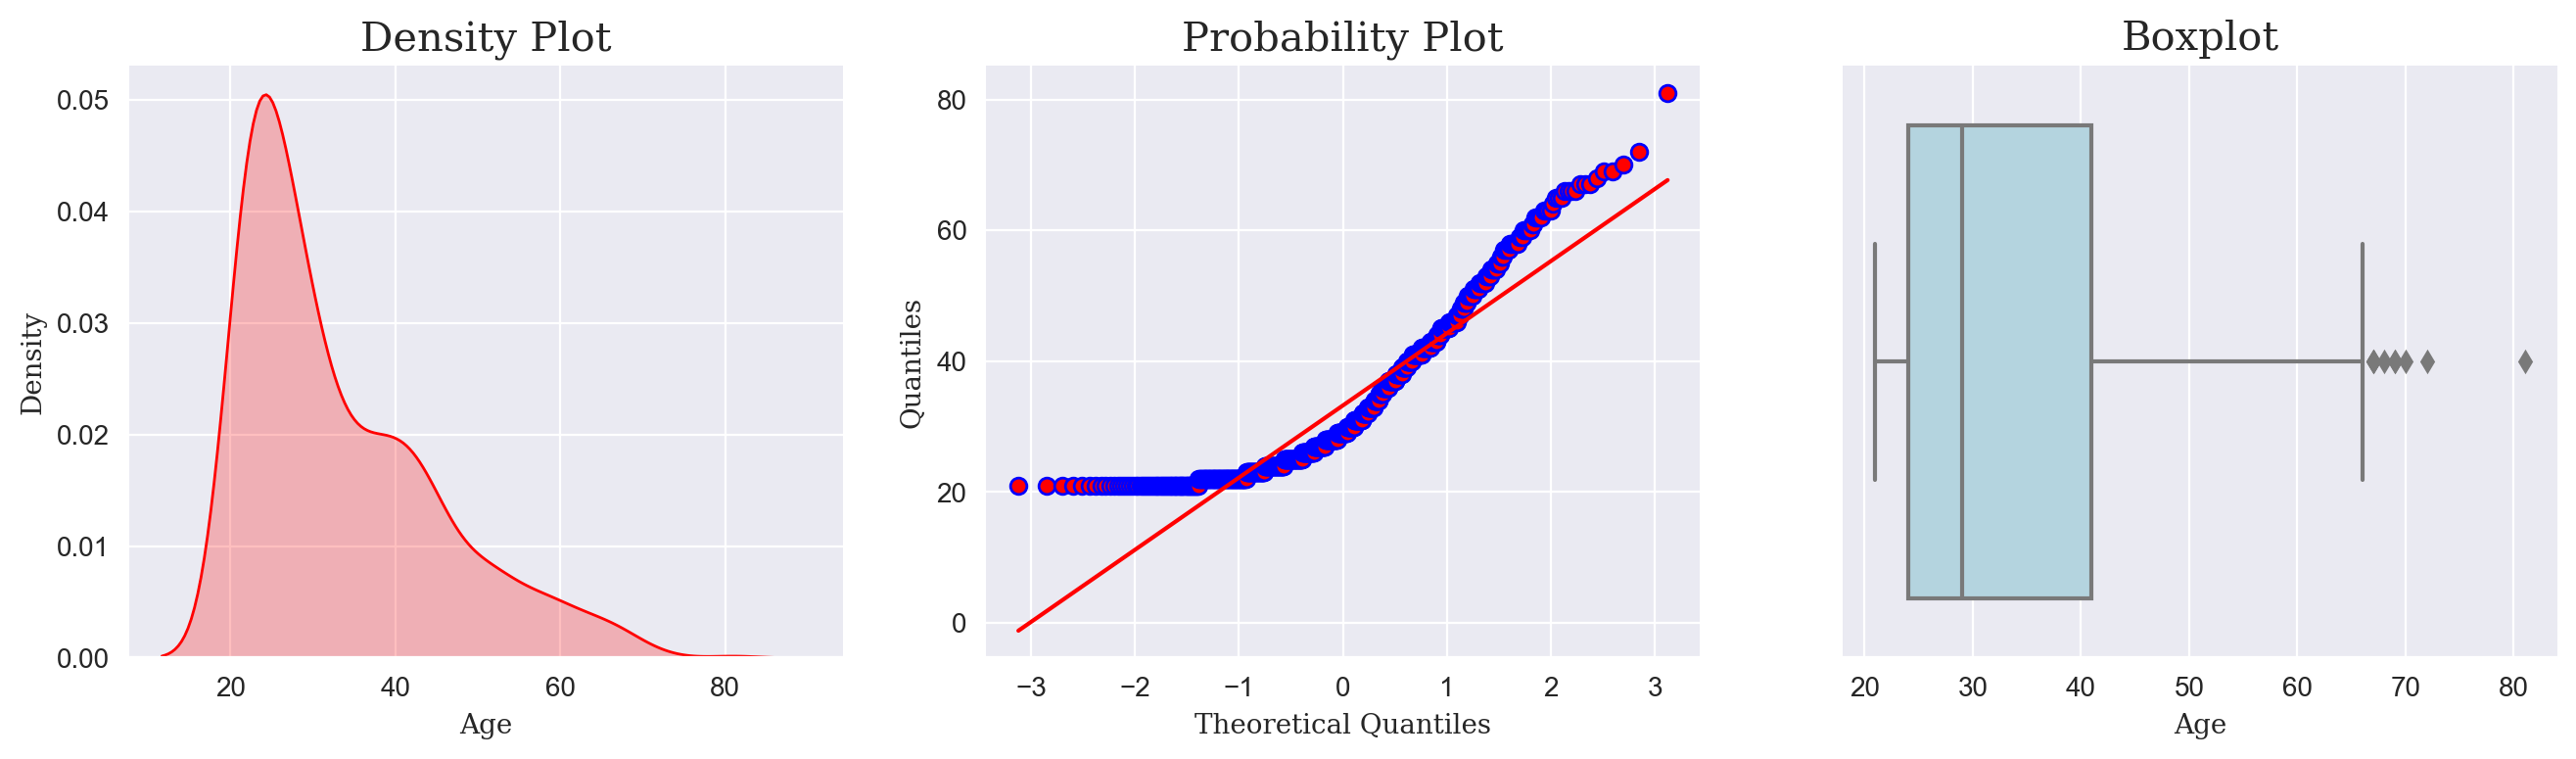

In [54]:
plots(data, 'Age')

In [55]:
# finding upper, lower boundary for insulin 
upper_boundary, lower_boundary = find_skewed_boundaries(data, 'Age', 1.5)
print(f"UPPER: {upper_boundary} & LOWER: {lower_boundary}")

# updating all values greater than upper to upper value
data.loc[data['Age'] > upper_boundary, 'Age'] = upper_boundary

UPPER: 66.5 & LOWER: -1.5


<h3> splitting  train test</h3>

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome',axis=1), 
                                                    data['Outcome'], test_size=0.2, 
                                                    random_state= 42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 12.72it/s]


In [57]:
models.sort_values('Accuracy',ascending =False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.77,0.76,0.76,0.77,0.01
RidgeClassifierCV,0.77,0.74,0.74,0.77,0.01
LinearDiscriminantAnalysis,0.76,0.74,0.74,0.76,0.35
RidgeClassifier,0.76,0.74,0.74,0.76,0.02
ExtraTreesClassifier,0.76,0.73,0.73,0.76,0.16
LinearSVC,0.75,0.73,0.73,0.75,0.06
CalibratedClassifierCV,0.75,0.73,0.73,0.75,0.14
GaussianNB,0.75,0.74,0.74,0.76,0.01
DecisionTreeClassifier,0.75,0.73,0.73,0.75,0.01
